# Background removal

In [1]:
from PIL import Image
image = Image.open('bllom.jpg')
image = image.convert('RGBA')
data = image.getdata()
bg_color = data[0]
new_data = []
color=(255, 255, 255, 0)
for item in data:

    if item[0] in range(bg_color[0]-10, bg_color[0]+11) and \
       item[1] in range(bg_color[1]-10, bg_color[1]+11) and \
       item[2] in range(bg_color[2]-10, bg_color[2]+11):
        new_data.append(color)
    else:
        new_data.append(item)

image.putdata(new_data)
image.save('logo_white_bg.png')


# Noise Removal


In [2]:
from PIL import Image, ImageFilter

image_path = 'logo_white_bg.png'
img = Image.open(image_path).convert('RGBA')

# Apply a median filter to reduce noise
img = img.filter(ImageFilter.MedianFilter(size=3))


cleaned_path = 'cleaned_image.png'
img.save(cleaned_path)



In [3]:

image_path = 'cleaned_image.png'
img = Image.open(image_path).convert('RGBA')
img = img.filter(ImageFilter.MedianFilter(size=3))
cleaned_path = 'cleaned_image1.png'
img.save(cleaned_path)



# Further Noise Removal

In [4]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('cleaned_image1.png')

# Convert to grayscale if needed
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply thresholding
_, thresholded = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)

# Invert if necessary
result = cv2.bitwise_not(thresholded)

# Save the result
cv2.imwrite('imgbg.png', result)


True

# Preserving Colors

In [5]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('cleaned_image1.png')

# Convert the image from BGR to YCrCb color space
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Split the channels
y, cr, cb = cv2.split(ycrcb)

# Apply Gaussian Blur to the Y channel
blurred_y = cv2.GaussianBlur(y, (5, 5), 0)

# # Apply thresholding to the blurred Y channel
# _, binary_y = cv2.threshold(blurred_y, 120, 255, cv2.THRESH_BINARY)


binary_y = cv2.bitwise_not(blurred_y)

# Merge the processed Y channel back with the Cr and Cb channels
merged = cv2.merge([blurred_y, cr, cb])

# Convert the image back to the BGR color space
final_image = cv2.cvtColor(merged, cv2.COLOR_YCrCb2BGR)

# Save the result
cv2.imwrite('imgcl.png', final_image)


True

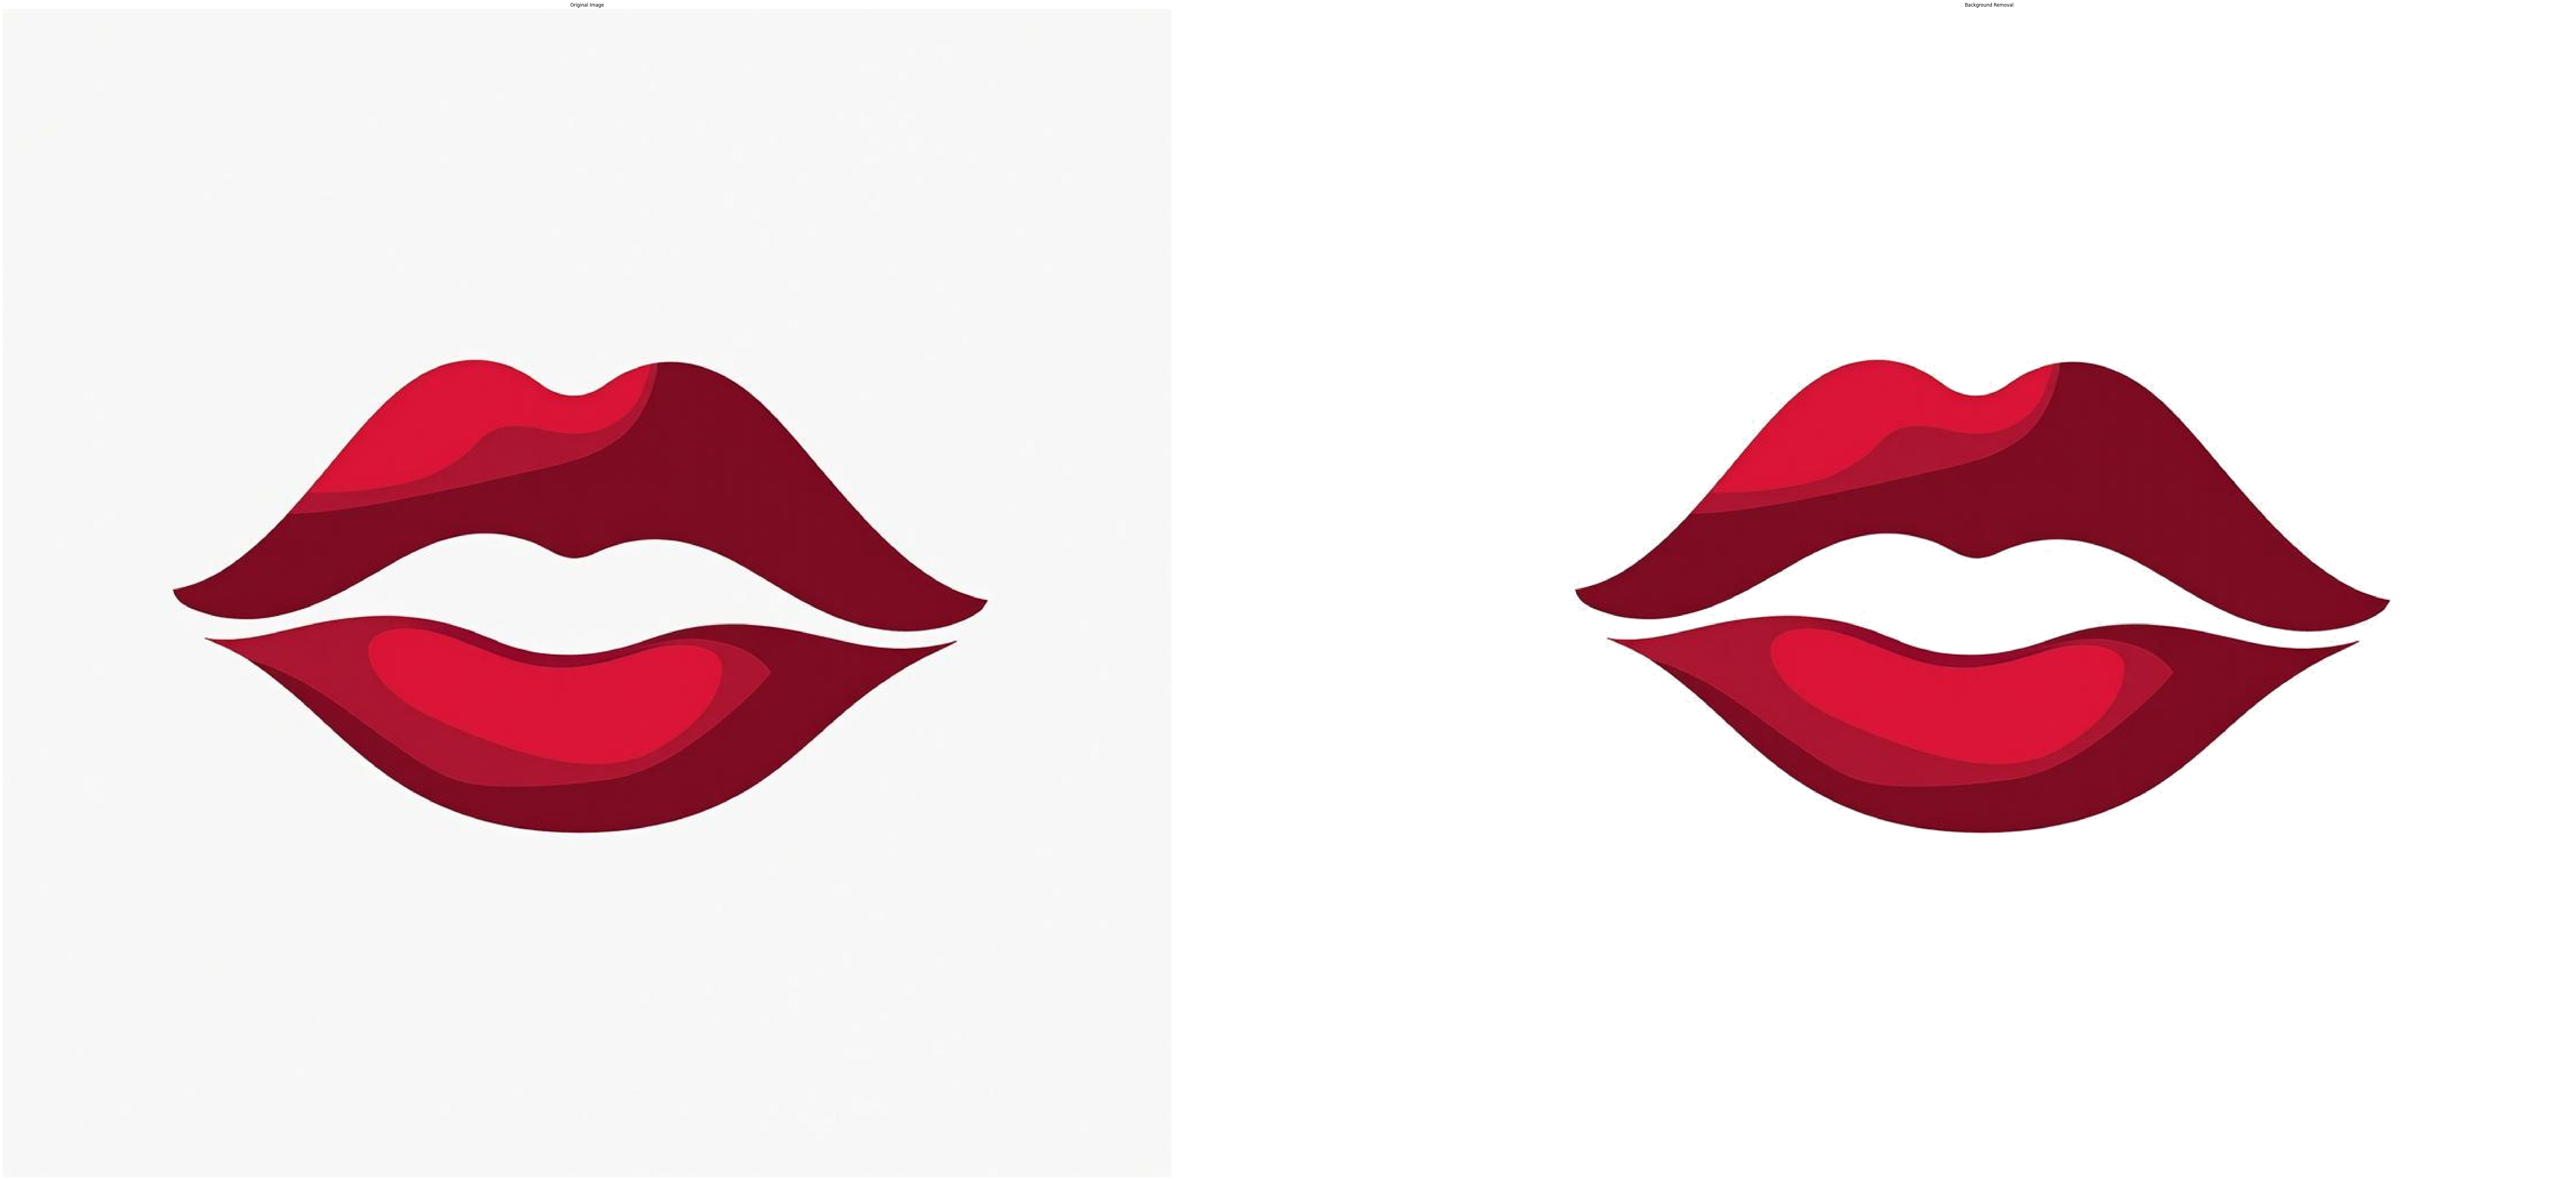

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original and processed images
original_image_path = 'bllom.jpg'  # Adjust the path to your original image
processed_image_path = 'logo_white_bg.png'  # Adjust the path to your processed image

original_image = Image.open(original_image_path)
processed_image = Image.open(processed_image_path)

# Convert images to numpy array for matplotlib compatibility
original_image = np.array(original_image)
processed_image = np.array(processed_image)

# Create a figure to display the images
fig, axes = plt.subplots(1, 2, figsize=(120, 60))  # Create 1 row, 2 columns of subplots

# Plot the original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide the axes ticks

# Plot the processed image
axes[1].imshow(processed_image)
axes[1].set_title('Background Removal')
axes[1].axis('off')  # Hide the axes ticks

plt.show()  # Display the plot


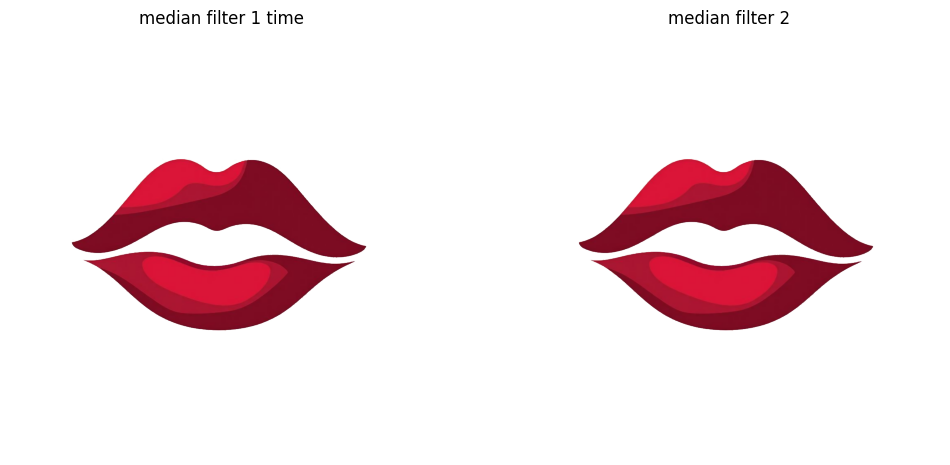

In [7]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original and processed images
original_image_path = 'cleaned_image.png'  # Adjust the path to your original image
processed_image_path = 'cleaned_image1.png'  # Adjust the path to your processed image

original_image = Image.open(original_image_path)
processed_image = Image.open(processed_image_path)

# Convert images to numpy array for matplotlib compatibility
original_image = np.array(original_image)
processed_image = np.array(processed_image)

# Create a figure to display the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create 1 row, 2 columns of subplots

# Plot the original image
axes[0].imshow(original_image)
axes[0].set_title('median filter 1 time')
axes[0].axis('off')  # Hide the axes ticks

# Plot the processed image
axes[1].imshow(processed_image)
axes[1].set_title('median filter 2')
axes[1].axis('off')  # Hide the axes ticks

plt.show()  # Display the plot



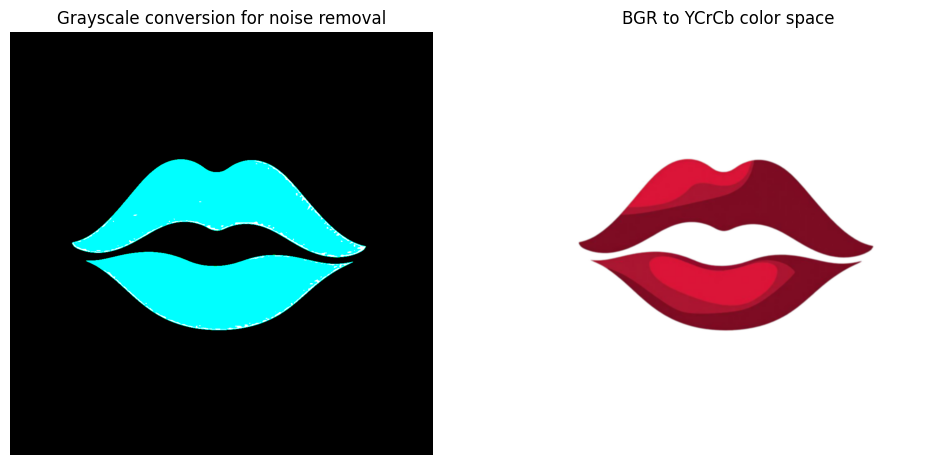

In [8]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original and processed images
original_image_path = 'imgbg.png'  # Adjust the path to your original image
processed_image_path = 'imgcl.png'  # Adjust the path to your processed image

original_image = Image.open(original_image_path)
processed_image = Image.open(processed_image_path)

# Convert images to numpy array for matplotlib compatibility
original_image = np.array(original_image)
processed_image = np.array(processed_image)

# Create a figure to display the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create 1 row, 2 columns of subplots

# Plot the original image
axes[0].imshow(original_image)
axes[0].set_title('Grayscale conversion for noise removal')
axes[0].axis('off')  # Hide the axes ticks

# Plot the processed image
axes[1].imshow(processed_image)
axes[1].set_title('BGR to YCrCb color space')
axes[1].axis('off')  # Hide the axes ticks

plt.show()  # Display the plot

